# ARIMA Model

### Libraries

In [11]:
import numpy as np
import pandas as pd
import pmdarima

from matplotlib import pyplot as plt
from sklearn import metrics
from statsmodels.tsa.arima_model import ARIMA

%matplotlib inline

### Data Import

In [8]:
# Load un-differenced dataframe

df = pd.read_pickle('data/processed.pkl')
df = df.set_index('DATE')  # Index for timeseries is datetime

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 708 entries, 1963-01-01 to 2021-12-01
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   MSACSR                      708 non-null    float64
 1   MSPUS                       708 non-null    float64
 2   S&P Comp.                   708 non-null    float64
 3   Dividend                    708 non-null    float64
 4   Earnings                    708 non-null    float64
 5   CPI                         708 non-null    float64
 6   Long Interest Rate GS10     708 non-null    float64
 7   Real Price                  708 non-null    float64
 8   Real Dividend               708 non-null    float64
 9   Real Total Return Price     708 non-null    float64
 10  Real Earnings               708 non-null    float64
 11  Real TR Scaled Earnings     708 non-null    float64
 12  CAPE                        708 non-null    float64
 13  Total Return CAP

In [9]:
df.head()

,MSACSR,MSPUS,S&P Comp.,Dividend,Earnings,CPI,Long Interest Rate GS10,Real Price,Real Dividend,Real Total Return Price,Real Earnings,Real TR Scaled Earnings,CAPE,Total Return CAPE,Excess CAPE Yield,Monthly Total Bond Returns,Real Total Bond Returns
DATE,,,,,,,,,,,,,,,,,
1963-01-01,4.7,17800.000000,65.06,2.14,3.68,30.4,3.83,621.38,20.41,73576.49,35.18,4165.49,19.26,22.79,2.71,1.00,11.97
1963-02-01,6.6,18012.732655,65.92,2.14,3.70,30.4,3.92,629.59,20.47,74751.05,35.31,4191.90,19.47,23.03,2.60,1.00,11.92
1963-03-01,6.4,18054.359981,65.67,2.15,3.71,30.5,3.93,625.15,20.47,74425.91,35.32,4204.66,19.29,22.81,2.63,1.00,11.91
1963-04-01,5.3,18000.000000,68.76,2.17,3.75,30.5,3.97,654.56,20.63,78132.53,35.73,4264.94,20.15,23.82,2.37,1.01,11.91
1963-05-01,5.1,17912.319136,70.14,2.18,3.80,30.5,3.93,667.70,20.78,79907.38,36.14,4325.38,20.51,24.23,2.29,1.00,11.98


In [2]:
# Load differenced dataframe

df_transformed = pd.read_pickle('data/differenced_df.pkl')
#df_transformed = df_transformed.set_index('DATE')  # Index for timeseries is datetime

df_transformed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 706 entries, 1 to 707
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   DATE                        706 non-null    datetime64[ns]
 1   MSACSR                      706 non-null    float64       
 2   MSPUS                       706 non-null    float64       
 3   S&P Comp.                   706 non-null    float64       
 4   Dividend                    706 non-null    float64       
 5   Earnings                    706 non-null    float64       
 6   CPI                         706 non-null    float64       
 7   Long Interest Rate GS10     705 non-null    float64       
 8   Real Price                  706 non-null    float64       
 9   Real Dividend               706 non-null    float64       
 10  Real Total Return Price     706 non-null    float64       
 11  Real Earnings               706 non-null    float64       

In [3]:
df_transformed.head()

,DATE,MSACSR,MSPUS,S&P Comp.,Dividend,Earnings,CPI,Long Interest Rate GS10,Real Price,Real Dividend,Real Total Return Price,Real Earnings,Real TR Scaled Earnings,CAPE,Total Return CAPE,Excess CAPE Yield,Monthly Total Bond Returns,Real Total Bond Returns
1,1963-02-01,0.339507,0.011880,0.013132,0.000000,0.005420,0.000000,NaN,0.013126,0.002935,0.015838,0.003688,0.006320,0.010844,0.010476,-0.041437,1.00,-0.004186
2,1963-03-01,-0.030772,0.002308,-0.003800,0.004662,0.002699,0.003284,0.01,-0.007077,0.000000,-0.004359,0.000283,0.003039,-0.009288,-0.009599,0.011472,1.00,-0.000839
3,1963-04-01,-0.188591,-0.003015,0.045980,0.009259,0.010724,0.000000,0.04,0.045972,0.007786,0.048602,0.011541,0.014235,0.043617,0.043327,-0.104094,1.01,0.000000
4,1963-05-01,-0.038466,-0.004883,0.019871,0.004598,0.013245,0.000000,-0.04,0.019876,0.007245,0.022462,0.011410,0.014072,0.017708,0.017066,-0.034338,1.00,0.005860
5,1963-06-01,0.162519,-0.003179,-0.000428,0.009132,0.010471,0.003273,0.06,-0.003706,0.004322,-0.001090,0.008267,0.010686,-0.006359,-0.006210,-0.017622,1.00,-0.004182


### Training

In [4]:
# Train ARIMA model using grid search for best parameters

arima_model = pmdarima.auto_arima(df_transformed['MSPUS'], start_p=0, start_q=0,
                            test='adf',
                            max_p=20, max_q=20,
                            m=1,
                            d=None,
                            information_criterion='aicc',
                            seasonal=False,
                            start_P=0,
                            D=0,
                            trace=True,
                            stepwise=True
                           )

print(arima_model.summary())

Performing stepwise search to minimize aicc
 ARIMA(0,0,0)(0,0,0)[0]             : AICC=-4335.457, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AICC=-5079.127, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AICC=-5087.466, Time=0.11 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AICC=-5585.135, Time=0.23 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AICC=-5973.655, Time=0.36 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AICC=-5776.541, Time=0.10 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AICC=-6137.875, Time=0.54 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AICC=-6185.921, Time=0.09 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AICC=-6188.893, Time=0.20 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AICC=-6275.477, Time=0.23 sec
 ARIMA(6,0,0)(0,0,0)[0]             : AICC=-6401.526, Time=0.32 sec
 ARIMA(7,0,0)(0,0,0)[0]             : AICC=-6429.407, Time=0.12 sec
 ARIMA(8,0,0)(0,0,0)[0]             : AICC=-6433.079, Time=0.26 sec
 ARIMA(9,0,0)(0,0,0)[0]             : AICC=-6436.036, Time=0.84 sec
 ARI

### Results

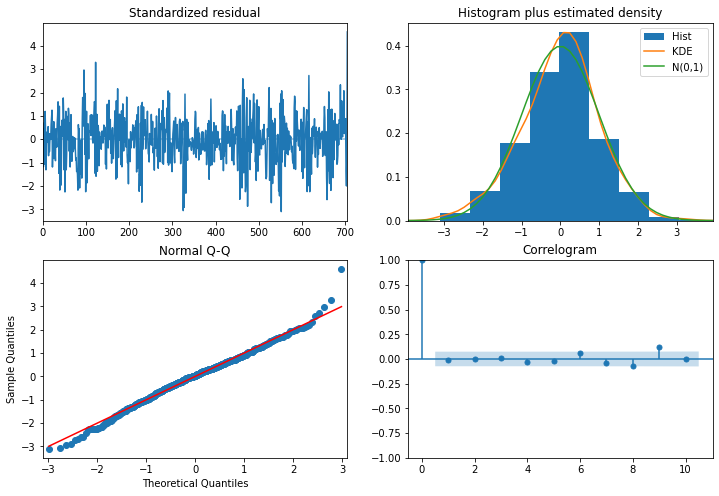

In [5]:
# Arima diagnostics plot

arima_model.plot_diagnostics(figsize=(12, 8))

plt.savefig('figures/arima_diagnostics.png')
plt.show()

Residual errors look to fluctuate around a mean of 0 and have uniform variance

Density plot shows values are approximately normally distributed

Quantiles show data isn't skewed, except possibly at the tails

ACF plot shows no autocorrelation

<AxesSubplot:>

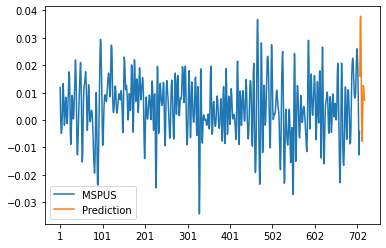

In [6]:
N_PRED = 12

new_index = df_transformed.iloc[-N_PRED:, :]['DATE']

# Get ARIMA predictions
forecast, conf_int = arima_model.predict(n_periods=N_PRED, return_conf_int=True)

# Put predictions into df
forecast_df = pd.DataFrame(forecast, 
                           index=new_index,
                           columns=['Prediction']
                          )

pd.concat( [df_transformed['MSPUS'], forecast_df], axis=1 ).plot()

In [12]:
# Convert back to price values

def inverse_pct_change(series, y_0):
    np_series = np.array(series)  # Use np array for built in cumsum
    np_series[0] = np.log(y_0)
    cumulative_sum = np_series.cumsum()
    
    return np.exp(cumulative_sum)

initial_value_pred = df.iloc[-N_PRED]['MSPUS']

print('y_0_pred', initial_value_pred)

# Convert predictions to price values
forecast_df['Pred_Price'] = inverse_pct_change(forecast_df['Prediction'], initial_value_pred)

# Convert confidence interval to price values
forecast_df['conf_lower'] = inverse_pct_change(conf_int[:, 0], initial_value_pred)
forecast_df['conf_upper'] = inverse_pct_change(conf_int[:, 1], initial_value_pred)

forecast_df.head()

y_0_pred 369800.0


,Prediction,Pred_Price,conf_lower,conf_upper
DATE,,,,
2021-01-01,0.016048,369800.000000,369800.000000,369800.000000
2021-02-01,0.037095,383775.466611,379707.834055,387886.673813
2021-03-01,0.037816,398566.293417,388036.498021,409381.826346
2021-04-01,0.021507,407231.189014,389433.814904,425841.914490
2021-05-01,0.000853,407578.783059,382843.469649,433912.231942


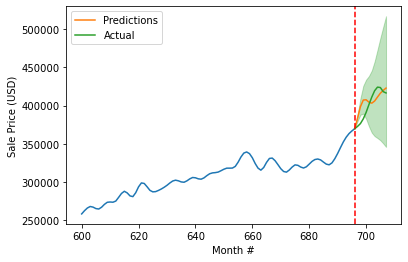

In [13]:
# Plot results in price
def plot_actual_vs_pred(test_predictions, test_actual, y, conf_lower, conf_upper, plot_savename):
    N = len(y)
    CUTOFF = 600  # 200 for quarterly data
    
    actual_slice_end = N - N_PRED + 1
    
    actual_slice = [i for i in range(CUTOFF, actual_slice_end)]
    pred_slice = [i for i in range(N - N_PRED, N)]
    plt.plot(actual_slice, y[CUTOFF:actual_slice_end])
    plt.fill_between(pred_slice, conf_lower, conf_upper, alpha=0.3, color='C2')
    plt.plot(pred_slice, test_predictions, label='Predictions')
    plt.plot(pred_slice, test_actual, label='Actual')
    plt.axvline(x=len(y)-N_PRED, c='red', linestyle='--')


    plt.legend()
    plt.xlabel('Month #')
    plt.ylabel('Sale Price (USD)')
    plt.savefig(plot_savename, bbox_inches='tight')
    plt.show()
    

test_actual = df.iloc[-N_PRED:]['MSPUS']

plot_name = 'figures/arima_scale_actual_vs_pred.png'
plot_actual_vs_pred(forecast_df['Pred_Price'], 
                    test_actual, 
                    df['MSPUS'], 
                    forecast_df['conf_lower'], forecast_df['conf_upper'], 
                    plot_name
                   )

### Model Error

In [14]:
# ARIMA Model Error
test_predictions = np.array(forecast_df['Pred_Price'])
test_actual = np.array(df.iloc[-N_PRED:]['MSPUS'])


# Compute standard error
N = len(test_actual)
SS_err = ((test_predictions - test_actual)**2).sum()
std_err = np.sqrt( SS_err / (N-2))

# Compute residual variance
# aka r^2 = 1 - R^2
y_vals = df['MSPUS'].copy()
SS_tot = ((y_vals - y_vals.mean())**2).sum()
res_var = SS_err / SS_tot

# Compute r squared
r2 = 1 - res_var

# Compute RMSE
mse = sklearnmetrics.mean_squared_error(test_predictions, test_actual)
rmse = np.sqrt(mse)

print('Residual Variance:', res_var)
print('R^2:', r2)
print('Standard Error:', std_err)
#print('MSE:', mse)
print('RMSE:', rmse)

NameError: name 'sklearn' is not defined